In [ ]:
import sys
import pandas       as pd
import tweepy       as tw
import re
import string
import nltk
import numpy        as np
from google.colab   import drive
from nltk.tokenize  import word_tokenize
from nltk.corpus    import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Functions**


In [ ]:
credentials={"acces_token":"1483453445067714578-Vby7z7jR5vgc6EJv9SokeRQ2zieP9z",
       "acces_token_secret":"6Pna3nPCRd48iFO0uXDuSGUG50z1xZDwdQE9CCVZazzmL",
       "consumer_api_key":"k2w3tGGixT9DiyzfKvilPPKB2",
       "consumer_api_secret":"S67BzozzR9dbcpEvpGf9nxlJX9G8khbJUlV1PPGAlDtGOgKNw5"}
import tweepy as tw
# Creating an autentication object
my_auth=tw.OAuthHandler(credentials["consumer_api_key"],credentials["consumer_api_secret"])
# Set acces token  and secret authentication object
my_auth.set_access_token(credentials["acces_token"],credentials["acces_token_secret"])
# Creating an API object pasing an authentication object
my_api=tw.API(my_auth,wait_on_rate_limit=True)

### get_tweet
   Function that retrieve tweets

In [ ]:
def get_tweet(word="Altcoin",quantity=5,since='2022-03-6',until='2022-03-12'):

  "Function to retrieve english tweets using tweepy, according the given word, quantity and start and end dates"

  if "tweepy" not in sys.modules:#check whether the tweepy library is already installed, and install it if not
    import tweepy as tw

  since_date = since # all retrieved tweets will be beyon this date
  until_date = until # all retrieved tweets will be before this date

  search_words = word
  new_search = search_words + " -filter:retweets" # Eliminate retweets
  import tweepy as tw
  my_tweets=tw.Cursor(my_api.search,
                      q=new_search,
                      lang="en",
                      since=since_date,
                      until=until_date,
                      result_type="mixed"
                             ).items(quantity)
  return my_tweets

### tweets_to_dataframe
 Function that turn a tweet object into a dataframe

In [ ]:
def tweets_to_dataframe(tweets):

  "Returns a pandas DataFrame with the columns(tweet's Attribute) tweet id, date, user id and tweet content from a group of tweets griven "

  text=[]
  for tweet in tweets:
    #  selecting the specific required data from retrieved tweets and placing them in an array
    text.append([tweet.id_str,tweet.created_at,tweet.user.id_str,tweet.text]) #https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

  import pandas as pd
  # Convert the array into a pandas dataframe with the columns(tweet's Attribute) tweet id, date, user id and tweet content
  df=pd.DataFrame(text,columns=["Tweet_id","Created_at","user_id","Tweet_text"])
  return df



### df_to_dictionary
  Function that return a dictionary with all the tweets and topics

In [ ]:
def df_to_dictionary(topics,q):
  "Function that uses tweets_to_dataframe and get_tweet to get a dictionary that contains all the tweets from a list of words given"

  # Create an empty dictionary to storage all the dataframes created from the retrieved tweets
  data={}

  for topic in topics:
    #Use the get_tweet and tweets_to_dataframe functions together to store in the data dictionary each dataframe separated by topic
    data[topic]=tweets_to_dataframe(get_tweet(word=topic,quantity=q))
  return data


### export_file
  Function that export each DataFrame in a dictionary to a google drive file

In [ ]:
def export_files(data):
  "Export each pandas DataFrame in the 'data' dictionary to the google file folder "

  if "drive" not in sys.modules: #check whether the google.colab.drive library is already installed, and install it if not
    from google.colab import drive

  # activate the google drive environment
  drive.mount('/content/drive/',force_remount=True)

  # iterate through the "dataframes" inside the data dictionary for exporting them
  for df in data:
    file_name=str(df)

    # create the file to store each tadaframe according to the iteration
    with open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/'+file_name+".csv","w") as file:

      # export each dataframe to ".csv" format
      data[df].to_csv(path_or_buf=file,index=False)

  # deactivate the google drive environment
  drive.flush_and_unmount()
  print('All changes made in this colab session should now be visible in Drive.')


### clean_text

In [ ]:
def clean_text(text):

  """ Remove special characters """
  text = re.sub('(@[a-z0-9]+)\w+','', text)
  text = re.sub('(http\S+)','', text)
  text = re.sub('([^0-9a-z \t])', '', text)
  text = re.sub(' +', ' ', text)
  """ Tokenize and remove stopwords """
  text = ' '.join(word for word in nltk.word_tokenize(text) if not word in stopwords)
  """ Remove words with length less than 2 """
  text = ' '.join(word for word in text.split() if len(word) > 1)

  return text

## **1. Collecting data**
In this assignment you need to collect data related to stock
market from Twitter for one week. In Twitter, ticker symbols like #gold are used for stocks and companies. You are requested to collect the tweets with some specific keywords and store them in different files. The following keywords should be used:
> * Altcoin
> * Bitcoin
> * Coindesk
> * Gold
> * APPL
> * GOOG
> * YHOO

### Retrieve tweets

In [ ]:
# Topics to retrieve
topics=["Altcoin","Bitcoin","Coindesk","Cryptocurrency","Gold","APPL","GOOG","YHOO"]

In [ ]:
# get the dictionary with the whole tweets
data=df_to_dictionary(topics=topics,q=10000)

In [ ]:
data.keys()

In [ ]:
# Display each DataFrame stored in the data dictionary
for df in data:
  print(f"DataFrame for tweets with word {df}\n")
  display(data[df].head(5))
  print("")
  print(data[df].info())
  #print(data[df]['Created_at'].value_counts())
  print("-"*50)

## **2. Saving data**
You need to save the requested data into csv format of 8 files where data related to each keyword is saved. Each file consist of four columns: tweet id, time of tweet, user id and text.

### Export data to the google drive files

In [ ]:
# Export Dataframes to drive repository on google drive by using export_files() function
export_files(data)



### Load saved files on google drive as pandas DataFrame

In [ ]:
# get .csv files from the google drive directory
from google.colab import drive

data={}

# Test Giu - Begin
  # I've commented this part cause I saved the df files into another folder, which is in my Google Drive


drive.mount('/content/drive/',force_remount=True)

data['Altcoin']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Altcoin.csv'),parse_dates=[1])
data['Bitcoin']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Bitcoin.csv'),parse_dates=[1])
data['Coindesk']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Coindesk.csv'),parse_dates=[1])
data['Cryptocurrency']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Cryptocurrency.csv'),parse_dates=[1])
data['Gold']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Gold.csv'),parse_dates=[1])
data['APPL']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/APPL.csv'),parse_dates=[1])
data['GOOG']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/GOOG.csv'),parse_dates=[1])
data['YHOO']=pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/YHOO.csv'),parse_dates=[1])
"""
drive.mount('/drive/', force_remount=True)

data['Altcoin']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/Altcoin.csv'),parse_dates=[1])
data['Bitcoin']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/Bitcoin.csv'),parse_dates=[1])
data['Coindesk']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/Coindesk.csv'),parse_dates=[1])
data['Cryptocurrency']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/Cryptocurrency.csv'),parse_dates=[1])
data['Gold']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/Gold.csv'),parse_dates=[1])
data['APPL']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/APPL.csv'),parse_dates=[1])
data['GOOG']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/GOOG.csv'),parse_dates=[1])
data['YHOO']=pd.read_csv(open('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_1/Files/Raw/YHOO.csv'),parse_dates=[1])"""

# Test Giu - End
data

Mounted at /content/drive/


{'APPL':                  Tweet_id          Created_at              user_id  \
 0     1502434144780898307 2022-03-11 23:59:48  1239976385667461120   
 1     1502433878157500416 2022-03-11 23:58:45  1447273381066387456   
 2     1502433858612080641 2022-03-11 23:58:40  1476891741965979648   
 3     1502433597701169154 2022-03-11 23:57:38  1276200703560765440   
 4     1502433560032071685 2022-03-11 23:57:29  1447273381066387456   
 ...                   ...                 ...                  ...   
 1148  1500315851018637312 2022-03-06 03:42:28             59780881   
 1149  1500315408095604741 2022-03-06 03:40:42             42124691   
 1150  1500315111709605892 2022-03-06 03:39:31           2374555376   
 1151  1500306336256507904 2022-03-06 03:04:39   901959301039874048   
 1152  1500305164414115840 2022-03-06 03:00:00  1105645728670441472   
 
                                              Tweet_text  
 0     @Appl_am_Apple @IAPonomarenko Russian soldiers...  
 1     @bullishdeer 

In [ ]:
display(data['Altcoin'].head(5))
display(data['Bitcoin'].head(5))
display(data['Coindesk'].head(5))
display(data['Cryptocurrency'].head(5))
display(data['Gold'].head(5))
display(data['APPL'].head(5))
display(data['GOOG'].head(5))
display(data['YHOO'].head(5))

,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502414205605101569,2022-03-11 22:40:34,9.787326e+17,Which #metaverse #altcoin do you prefer?\n\n$G...,metaverse altcoin prefergala sand mana
1,1502209965901025280,2022-03-11 09:09:00,1.052454e+18,Join #BNBChainAfrica live on Twitter Space fo...,join bnbchainafrica live twitter space session...
2,1502015288669356048,2022-03-10 20:15:25,7.829462e+17,I just discovered an #altcoin that i think wil...,discovered altcoin think 2030x next months
3,1502433915172442112,2022-03-11 23:58:53,1.499986e+18,@AltcoinRadarYT $kunci #KunciCoin why ? its st...,kunci kuncicoin still early great real project...
4,1502433876207370242,2022-03-11 23:58:44,8.318148e+17,@Degenomics2000 $KUNCI\n#KUNCIARMY\n@Kuncicoin...,kuncikunciarmy already listing pancake swap co...


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501681721862938629,2022-03-09 22:09:57,361289499,JUST IN: #Bitcoin and #crypto friendly politic...,bitcoin crypto friendly politician yoon sukyeo...
1,1501239532158693376,2022-03-08 16:52:50,29856819,BYE-BYE BITCOIN: Prediction. Biden to sign EX...,byebye bitcoin prediction biden sign executive...
2,1500534560077066245,2022-03-06 18:11:32,361289499,BREAKING 💥 Apple co-founder: #Bitcoin is the o...,breaking apple cofounder bitcoin puregold cryp...
3,1502434189626511360,2022-03-11 23:59:59,1415828570140815362,This amazing faucet from @_bitcoiner is making...,amazing faucet bitcoiner making tweet claim fr...
4,1502434188628316170,2022-03-11 23:59:59,1381699484988637194,@NEEDcreations A couple hours of coding in Pyt...,couple hours coding python using matplotlib co...


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501677267344363522,2022-03-09 21:52:15,1333467482,"Yoon Suk-Yeol, a conservative candidate who ca...",yoon sukyeol conservative candidate campaigned...
1,1501309972822515715,2022-03-08 21:32:45,989912836901089282,BREAKING: Goldman Sachs is offering clients ac...,breaking goldman sachs offering clients access...
2,1501660070202990594,2022-03-09 20:43:54,1333467482,Biden's executive order defines six “key prior...,bidens executive order defines six key priorit...
3,1502433989528854531,2022-03-11 23:59:11,961392050179584000,@ADonateUkraine @CoinDesk @Rob_Stevens_ $ADU t...,adu token donated 250k like 23 days ukrainethi...
4,1502433809190506497,2022-03-11 23:58:28,429909102,@ADonateUkraine @CoinDesk @Rob_Stevens_ LFG $A...,lfg adu keep good work ukrain


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501955491467075585,2022-03-10 16:17:48,8.851495e+08,Putin has overestimated his ability to use cry...,putin overestimated ability use cryptocurrency...
1,1502416877066366979,2022-03-11 22:51:11,1.370708e+18,@CRYPT0DIAMOND Indeed we are\n\n#cryptotwitter...,indeed arecryptotwitter cryptocurrency retail ...
2,1500534560077066245,2022-03-06 18:11:32,3.612895e+08,BREAKING 💥 Apple co-founder: #Bitcoin is the o...,breaking apple cofounder bitcoin puregold cryp...
3,1502434181242290178,2022-03-11 23:59:57,1.249420e+18,"Just check portfolio and conclusion ""Lal Ishq""...",check portfolio conclusion lal ishq cryptodown...
4,1502434180054978560,2022-03-11 23:59:57,1.479920e+18,“Brought to you by Saitama” sounds really damn...,brought saitama sounds really damn good eaglef...


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502268189740535809,2022-03-11 13:00:21,1.416932e+18,The #CHAKHO YouTube channel(https://t.co/5F5eL...,chakho youtube channel finally received gold p...
1,1502302074108743684,2022-03-11 15:15:00,8.844211e+07,"'My Universe', the single by @coldplay and @BT...",universe single britcertified gold
2,1500353512282091521,2022-03-06 06:12:07,1.354217e+08,.@imjadeja is turning everything into gold! 🏏\...,turning everything gold wonderful performancei...
3,1502434191757168647,2022-03-11 23:59:59,1.495555e+18,@YoungAri_Gold Bro he’s not top 5 lmao he’s ju...,bro hes top lmao hes like kylur murray hes not...
4,1502434180365373440,2022-03-11 23:59:57,1.245075e+18,@Quinnvestments Whenever destroyers appear amo...,whenever destroyers appear among men start des...


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502434144780898307,2022-03-11 23:59:48,1239976385667461120,@Appl_am_Apple @IAPonomarenko Russian soldiers...,russian soldiers say every war longer excuse
1,1502433878157500416,2022-03-11 23:58:45,1447273381066387456,@bullishdeer @IAPonomarenko I have never do that!,never
2,1502433858612080641,2022-03-11 23:58:40,1476891741965979648,@Appl_am_Apple @IAPonomarenko They say that on...,say caught hear private talks mot
3,1502433597701169154,2022-03-11 23:57:38,1276200703560765440,@Appl_am_Apple @ElonGuild @IAPonomarenko It's ...,fallacy1 russians support putin imperialistic ...
4,1502433560032071685,2022-03-11 23:57:29,1447273381066387456,@martianredplan1 @ElonGuild @IAPonomarenko Hoo...,hooo thanks fox amp co trump elected mr 45


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502414064332460036,2022-03-11 22:40:01,2.277554e+08,Google is going shopping.\n\nThe tech giant is...,google going shoppingthe tech giant looking sc...
1,1501593039655026697,2022-03-09 16:17:33,3.917661e+07,TASS is reporting that a threat actor has defa...,tass reporting threat actor defaced several ru...
2,1502434049620865024,2022-03-11 23:59:25,2.790181e+09,$TSLA there’s a chance this might come close t...,tsla theres chance might come close 224 dip li...
3,1502433743319220224,2022-03-11 23:58:12,1.331137e+08,$GOOG major outage affecting purchases on Goog...,goog major outage affecting purchases google p...
4,1502433665984483328,2022-03-11 23:57:54,2.823828e+08,@ccinvest2 @cdn_investing Regardless of curren...,regardless current valuation csu cost goog


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502017895450091520,2022-03-10 20:25:47,7302282,🚨 BASEBALL IS BACK 🚨\n\nThere will be a baseba...,baseball back baseball season full 162game one
1,1501234996199268352,2022-03-08 16:34:49,7302282,🚨 Aaron Rodgers and the Packers have agreed to...,aaron rodgers packers agreed 4year 200m deal m...
2,1500887409487192066,2022-03-07 17:33:38,7309052,Three Ukrainian supermarket chains pulled Coca...,three ukrainian supermarket chains pulled coca...
3,1502433897602244608,2022-03-11 23:58:49,3078606944,@Tshepis87640805 Yhoo🙆🙆🙆 no guys,yhoo guys
4,1502433667091779585,2022-03-11 23:57:54,2236995958,@Snezo_Ntaka Yhoo😭😂😂 https://t.co/4GdnsY7q4V,yhoo


## **3. Cleaning data**

Remove duplication, remove punctuations, remove numbers in tweets, and remove words with length less than 2.

### Data cleaning

In [ ]:
for df in data:
  data[df]['Tweet_text_cleaned'] = data[df]['Tweet_text'].apply(lambda x: clean_text(str(x).lower()))
  print(f'DataFrame is: {df}')
  display(data[df].head(5))
  print('')

DataFrame is: Altcoin


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502414205605101569,2022-03-11 22:40:34,9.787326e+17,Which #metaverse #altcoin do you prefer?\n\n$G...,metaverse altcoin prefergala sand mana
1,1502209965901025280,2022-03-11 09:09:00,1.052454e+18,Join #BNBChainAfrica live on Twitter Space fo...,join bnbchainafrica live twitter space session...
2,1502015288669356048,2022-03-10 20:15:25,7.829462e+17,I just discovered an #altcoin that i think wil...,discovered altcoin think 2030x next months
3,1502433915172442112,2022-03-11 23:58:53,1.499986e+18,@AltcoinRadarYT $kunci #KunciCoin why ? its st...,kunci kuncicoin still early great real project...
4,1502433876207370242,2022-03-11 23:58:44,8.318148e+17,@Degenomics2000 $KUNCI\n#KUNCIARMY\n@Kuncicoin...,kuncikunciarmy already listing pancake swap co...



DataFrame is: Bitcoin


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501681721862938629,2022-03-09 22:09:57,361289499,JUST IN: #Bitcoin and #crypto friendly politic...,bitcoin crypto friendly politician yoon sukyeo...
1,1501239532158693376,2022-03-08 16:52:50,29856819,BYE-BYE BITCOIN: Prediction. Biden to sign EX...,byebye bitcoin prediction biden sign executive...
2,1500534560077066245,2022-03-06 18:11:32,361289499,BREAKING 💥 Apple co-founder: #Bitcoin is the o...,breaking apple cofounder bitcoin puregold cryp...
3,1502434189626511360,2022-03-11 23:59:59,1415828570140815362,This amazing faucet from @_bitcoiner is making...,amazing faucet bitcoiner making tweet claim fr...
4,1502434188628316170,2022-03-11 23:59:59,1381699484988637194,@NEEDcreations A couple hours of coding in Pyt...,couple hours coding python using matplotlib co...



DataFrame is: Coindesk


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501677267344363522,2022-03-09 21:52:15,1333467482,"Yoon Suk-Yeol, a conservative candidate who ca...",yoon sukyeol conservative candidate campaigned...
1,1501309972822515715,2022-03-08 21:32:45,989912836901089282,BREAKING: Goldman Sachs is offering clients ac...,breaking goldman sachs offering clients access...
2,1501660070202990594,2022-03-09 20:43:54,1333467482,Biden's executive order defines six “key prior...,bidens executive order defines six key priorit...
3,1502433989528854531,2022-03-11 23:59:11,961392050179584000,@ADonateUkraine @CoinDesk @Rob_Stevens_ $ADU t...,adu token donated 250k like 23 days ukrainethi...
4,1502433809190506497,2022-03-11 23:58:28,429909102,@ADonateUkraine @CoinDesk @Rob_Stevens_ LFG $A...,lfg adu keep good work ukrain



DataFrame is: Cryptocurrency


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1501955491467075585,2022-03-10 16:17:48,8.851495e+08,Putin has overestimated his ability to use cry...,putin overestimated ability use cryptocurrency...
1,1502416877066366979,2022-03-11 22:51:11,1.370708e+18,@CRYPT0DIAMOND Indeed we are\n\n#cryptotwitter...,indeed arecryptotwitter cryptocurrency retail ...
2,1500534560077066245,2022-03-06 18:11:32,3.612895e+08,BREAKING 💥 Apple co-founder: #Bitcoin is the o...,breaking apple cofounder bitcoin puregold cryp...
3,1502434181242290178,2022-03-11 23:59:57,1.249420e+18,"Just check portfolio and conclusion ""Lal Ishq""...",check portfolio conclusion lal ishq cryptodown...
4,1502434180054978560,2022-03-11 23:59:57,1.479920e+18,“Brought to you by Saitama” sounds really damn...,brought saitama sounds really damn good eaglef...



DataFrame is: Gold


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502268189740535809,2022-03-11 13:00:21,1.416932e+18,The #CHAKHO YouTube channel(https://t.co/5F5eL...,chakho youtube channel finally received gold p...
1,1502302074108743684,2022-03-11 15:15:00,8.844211e+07,"'My Universe', the single by @coldplay and @BT...",universe single britcertified gold
2,1500353512282091521,2022-03-06 06:12:07,1.354217e+08,.@imjadeja is turning everything into gold! 🏏\...,turning everything gold wonderful performancei...
3,1502434191757168647,2022-03-11 23:59:59,1.495555e+18,@YoungAri_Gold Bro he’s not top 5 lmao he’s ju...,bro hes top lmao hes like kylur murray hes not...
4,1502434180365373440,2022-03-11 23:59:57,1.245075e+18,@Quinnvestments Whenever destroyers appear amo...,whenever destroyers appear among men start des...



DataFrame is: APPL


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502434144780898307,2022-03-11 23:59:48,1239976385667461120,@Appl_am_Apple @IAPonomarenko Russian soldiers...,russian soldiers say every war longer excuse
1,1502433878157500416,2022-03-11 23:58:45,1447273381066387456,@bullishdeer @IAPonomarenko I have never do that!,never
2,1502433858612080641,2022-03-11 23:58:40,1476891741965979648,@Appl_am_Apple @IAPonomarenko They say that on...,say caught hear private talks mot
3,1502433597701169154,2022-03-11 23:57:38,1276200703560765440,@Appl_am_Apple @ElonGuild @IAPonomarenko It's ...,fallacy1 russians support putin imperialistic ...
4,1502433560032071685,2022-03-11 23:57:29,1447273381066387456,@martianredplan1 @ElonGuild @IAPonomarenko Hoo...,hooo thanks fox amp co trump elected mr 45



DataFrame is: GOOG


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502414064332460036,2022-03-11 22:40:01,2.277554e+08,Google is going shopping.\n\nThe tech giant is...,google going shoppingthe tech giant looking sc...
1,1501593039655026697,2022-03-09 16:17:33,3.917661e+07,TASS is reporting that a threat actor has defa...,tass reporting threat actor defaced several ru...
2,1502434049620865024,2022-03-11 23:59:25,2.790181e+09,$TSLA there’s a chance this might come close t...,tsla theres chance might come close 224 dip li...
3,1502433743319220224,2022-03-11 23:58:12,1.331137e+08,$GOOG major outage affecting purchases on Goog...,goog major outage affecting purchases google p...
4,1502433665984483328,2022-03-11 23:57:54,2.823828e+08,@ccinvest2 @cdn_investing Regardless of curren...,regardless current valuation csu cost goog



DataFrame is: YHOO


,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502017895450091520,2022-03-10 20:25:47,7302282,🚨 BASEBALL IS BACK 🚨\n\nThere will be a baseba...,baseball back baseball season full 162game one
1,1501234996199268352,2022-03-08 16:34:49,7302282,🚨 Aaron Rodgers and the Packers have agreed to...,aaron rodgers packers agreed 4year 200m deal m...
2,1500887409487192066,2022-03-07 17:33:38,7309052,Three Ukrainian supermarket chains pulled Coca...,three ukrainian supermarket chains pulled coca...
3,1502433897602244608,2022-03-11 23:58:49,3078606944,@Tshepis87640805 Yhoo🙆🙆🙆 no guys,yhoo guys
4,1502433667091779585,2022-03-11 23:57:54,2236995958,@Snezo_Ntaka Yhoo😭😂😂 https://t.co/4GdnsY7q4V,yhoo


### Removing duplicates

In [ ]:
## Removing duplicated values or empty tweets (after the cleaning)
for df in data:

  """ Remove the duplicates """
  data[df].drop_duplicates(subset=['Tweet_text_cleaned'], inplace=True)

  """ Remove null values """
  data[df]['Tweet_text_cleaned'].replace('', np.nan, inplace=True)
  data[df].dropna(subset=['Tweet_text_cleaned'], inplace=True)

  """ Check null values in the target column """
  print(f'DataFrame is: {df}')
  print(f"null tweet qty: {data[df]['Tweet_text_cleaned'].isnull().sum()}")
  print(' ')

DataFrame is: Altcoin
null tweet qty: 0
 
DataFrame is: Bitcoin
null tweet qty: 0
 
DataFrame is: Coindesk
null tweet qty: 0
 
DataFrame is: Cryptocurrency
null tweet qty: 0
 
DataFrame is: Gold
null tweet qty: 0
 
DataFrame is: APPL
null tweet qty: 0
 
DataFrame is: GOOG
null tweet qty: 0
 
DataFrame is: YHOO
null tweet qty: 0
 


## **4. Visualizing data**

Concat all the dataframes in only one

In [ ]:
n_data=pd.concat([data['Altcoin'],data['Bitcoin'],data['Coindesk'],data['Cryptocurrency'],data['Gold'],data['APPL'],data['GOOG'],data['YHOO']],axis=0,ignore_index=True)
n_data

,Tweet_id,Created_at,user_id,Tweet_text,Tweet_text_cleaned
0,1502414205605101569,2022-03-11 22:40:34,9.787326e+17,Which #metaverse #altcoin do you prefer?\n\n$G...,metaverse altcoin prefergala sand mana
1,1502209965901025280,2022-03-11 09:09:00,1.052454e+18,Join #BNBChainAfrica live on Twitter Space fo...,join bnbchainafrica live twitter space session...
2,1502015288669356048,2022-03-10 20:15:25,7.829462e+17,I just discovered an #altcoin that i think wil...,discovered altcoin think 2030x next months
3,1502433915172442112,2022-03-11 23:58:53,1.499986e+18,@AltcoinRadarYT $kunci #KunciCoin why ? its st...,kunci kuncicoin still early great real project...
4,1502433876207370242,2022-03-11 23:58:44,8.318148e+17,@Degenomics2000 $KUNCI\n#KUNCIARMY\n@Kuncicoin...,kuncikunciarmy already listing pancake swap co...
...,...,...,...,...,...
29745,1500312855316508674,2022-03-06 03:30:33,1.028544e+07,Enhancements to Pryon's Platform Release 4.6 S...,enhancements pryons platform release 46 sets r...
29746,1500310895011979264,2022-03-06 03:22:46,1.269772e+18,"@PabiieR It's on Mahatma Gandhi, Black Coffee,...",mahatma gandhi black coffee ramaphosa queen el...
29747,1500309239629189126,2022-03-06 03:16:11,7.284235e+17,Warning over Centrelink ‘refund’ email https:/...,warning centrelink refund email
29748,1500308409123545089,2022-03-06 03:12:53,9.332828e+17,@LytSkinnedGirl Ave been in a friend's house w...,ave friends house girl see came friend obvious...


In [ ]:
data_grouped_by_date={}
for df in data:
  data[df]['Date']=data[df]['Created_at'].dt.date

for df in data:
  data_grouped_by_date[df]=data[df].groupby(['Date'])[['Tweet_text']].count().reset_index()
  print(df)
  display(data_grouped_by_date[df])


Altcoin


,Date,Tweet_text
0,2022-03-09,1537
1,2022-03-10,4460
2,2022-03-11,13


Bitcoin


,Date,Tweet_text
0,2022-03-06,6660
1,2022-03-08,1
2,2022-03-09,1
3,2022-03-11,11


Coindesk


,Date,Tweet_text
0,2022-03-07,1115
1,2022-03-08,1518
2,2022-03-09,2
3,2022-03-11,10


Cryptocurrency


,Date,Tweet_text
0,2022-03-06,6283
1,2022-03-10,1
2,2022-03-11,12


Gold


,Date,Tweet_text
0,2022-03-06,5505
1,2022-03-11,14


APPL


,Date,Tweet_text
0,2022-03-06,64
1,2022-03-07,195
2,2022-03-08,244
3,2022-03-09,144
4,2022-03-10,165
5,2022-03-11,209


GOOG


,Date,Tweet_text
0,2022-03-09,341
1,2022-03-11,13


YHOO


,Date,Tweet_text
0,2022-03-06,668
1,2022-03-07,547
2,2022-03-08,1
3,2022-03-10,1
4,2022-03-11,11


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
for df in data_grouped_by_date:
  data_grouped_by_date[df].index=data_grouped_by_date[df]['Date']



In [ ]:
for df in data_grouped_by_date:
  print(df)
  display(data_grouped_by_date[df])

Altcoin


,Date,Tweet_text
Date,,
2022-03-09,2022-03-09,1537
2022-03-10,2022-03-10,4460
2022-03-11,2022-03-11,13


Bitcoin


,Date,Tweet_text
Date,,
2022-03-06,2022-03-06,6660
2022-03-08,2022-03-08,1
2022-03-09,2022-03-09,1
2022-03-11,2022-03-11,11


Coindesk


,Date,Tweet_text
Date,,
2022-03-07,2022-03-07,1115
2022-03-08,2022-03-08,1518
2022-03-09,2022-03-09,2
2022-03-11,2022-03-11,10


Cryptocurrency


,Date,Tweet_text
Date,,
2022-03-06,2022-03-06,6283
2022-03-10,2022-03-10,1
2022-03-11,2022-03-11,12


Gold


,Date,Tweet_text
Date,,
2022-03-06,2022-03-06,5505
2022-03-11,2022-03-11,14


APPL


,Date,Tweet_text
Date,,
2022-03-06,2022-03-06,64
2022-03-07,2022-03-07,195
2022-03-08,2022-03-08,244
2022-03-09,2022-03-09,144
2022-03-10,2022-03-10,165
2022-03-11,2022-03-11,209


GOOG


,Date,Tweet_text
Date,,
2022-03-09,2022-03-09,341
2022-03-11,2022-03-11,13


YHOO


,Date,Tweet_text
Date,,
2022-03-06,2022-03-06,668
2022-03-07,2022-03-07,547
2022-03-08,2022-03-08,1
2022-03-10,2022-03-10,1
2022-03-11,2022-03-11,11


### **pie chart**

In [ ]:
plt.pie(data_grouped_by_date['APPL']['Tweet_text'])
plt.show

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.utils.extmath import fast_logdet

# here we want our grid to be 4 * 2
rows = 4
cols = 2

# a compact and general version of what you did
specs = [[{'type':'domain'}] * cols] * rows

# are the titles for subplots
fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=topics,
        specs=specs,
        print_grid=True)

for i, l in enumerate(topics):
    # basic math to get col and row
    col = i // rows + 1
    row = i % (cols +2 ) + 1

    fig.add_trace(
        go.Pie(labels=data_grouped_by_date[l]['Date'],
               values=data_grouped_by_date[l]['Tweet_text'],
               showlegend=True,
               textposition='inside',
               textinfo='label+percent'),
         row=row,
         col=col

    )

fig.update_layout(title="Tweets by Keywords",width = 2000, height = 2000, title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]
[ (2,1)  ]  [ (2,2)  ]
[ (3,1)  ]  [ (3,2)  ]
[ (4,1)  ]  [ (4,2)  ]



### **Word cloud**

In [ ]:
tweets = n_data['Tweet_text_cleaned']
tweets

0                   metaverse altcoin prefergala sand mana
1        join bnbchainafrica live twitter space session...
2               discovered altcoin think 2030x next months
3        kunci kuncicoin still early great real project...
4        kuncikunciarmy already listing pancake swap co...
                               ...                        
29745    enhancements pryons platform release 46 sets r...
29746    mahatma gandhi black coffee ramaphosa queen el...
29747                      warning centrelink refund email
29748    ave friends house girl see came friend obvious...
29749    joro spider newest invasive species spider eas...
Name: Tweet_text_cleaned, Length: 29750, dtype: object

### **Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
word_tokens = [word_tokenize(i) for i in tweets]
word_tokens



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['metaverse', 'altcoin', 'prefergala', 'sand', 'mana'],
 ['join',
  'bnbchainafrica',
  'live',
  'twitter',
  'space',
  'session',
  'get',
  'p2ehosted'],
 ['discovered', 'altcoin', 'think', '2030x', 'next', 'months'],
 ['kunci',
  'kuncicoin',
  'still',
  'early',
  'great',
  'real',
  'project',
  'utilize',
  'hospitality',
  'man'],
 ['kuncikunciarmy', 'already', 'listing', 'pancake', 'swap', 'coingecko'],
 ['get',
  'use',
  'momentum',
  'cloud',
  'indicatorcryptotrading',
  'cryptocurrency'],
 ['cardano',
  'fear',
  'greed',
  'index',
  'currently',
  '27',
  'strong',
  'fearcurrent',
  'ada',
  'price',
  '07923939047519782',
  'usdcurrent'],
 ['hellothis',
  'new',
  'comer',
  'indonesia',
  'kunci',
  'great',
  'dev',
  'real',
  'project',
  'many',
  'util'],
 ['shinja',
  'listed',
  '8th',
  'exchange',
  'dojoswap',
  'last',
  'days',
  'live',
  '1617'],
 ['shinja',
  'listed',
  '8th',
  'exchange',
  'dojoswap',
  'last',
  'days',
  'live',
  'aft'],
 ['

In [ ]:
len(word_tokens)

29750

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize(word):
    return lemmatizer.lemmatize(word)

In [ ]:
nltk.download('wordnet')
words = [' '.join(lemmatize(w)for w in sen) for sen in word_tokens]
words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['metaverse altcoin prefergala sand mana',
 'join bnbchainafrica live twitter space session get p2ehosted',
 'discovered altcoin think 2030x next month',
 'kunci kuncicoin still early great real project utilize hospitality man',
 'kuncikunciarmy already listing pancake swap coingecko',
 'get use momentum cloud indicatorcryptotrading cryptocurrency',
 'cardano fear greed index currently 27 strong fearcurrent ada price 07923939047519782 usdcurrent',
 'hellothis new comer indonesia kunci great dev real project many util',
 'shinja listed 8th exchange dojoswap last day live 1617',
 'shinja listed 8th exchange dojoswap last day live aft',
 'shinja listed 8th exchange dojoswap last day live 1617 mar',
 'shinja listed 8th exchange dojoswap last day liv',
 'shinja listed 8th exchange dojoswap last day live',
 'xrp altcoin season',
 'check future defi trading revolutionalising way',
 'one prefer lady crypto cryptocurrency blockchain altcoinbitcoin ethereum btc eth xrp',
 'ethereum classic fear 

**we are using the Tfidfvectorizer from sklearn to create the word vector which is based on the Term Frequency and Inverse Document Frequency. after initializing the model, we fit the model with the data we have created and then store them in a dataframe.**

**we fist fit the model with no normalization and we found that the most used word is bitcoin.**

In [ ]:
tv = TfidfVectorizer(
binary=False, norm=None,
use_idf=True, smooth_idf=True,
lowercase=True,
min_df=1, max_df=1.0, max_features=None,
ngram_range=(1, 1))

In [ ]:
model_tf_idf = tv.fit_transform(words)

In [ ]:
df_tf_idf = pd.DataFrame(model_tf_idf.sum(axis=0),columns=tv.get_feature_names_out())

In [ ]:
df_tf_idf.sum().sort_values(ascending=False)

bitcoin           16051.279831
gold              13070.857218
project           11081.922087
cryptocurrency    10261.298581
crypto            10146.519825
                      ...     
dwell                10.607471
dwargons             10.607471
dwarfism             10.607471
dwac                 10.607471
zz                   10.607471
Length: 35663, dtype: float64

In [ ]:
def word_cloud_render(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 20))
    # No axis details
    plt.axis("off")
    # Display image
    plt.imshow(wordcloud)

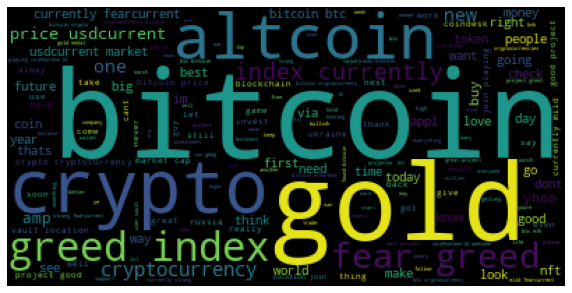

In [ ]:
wordcloud = WordCloud().generate(' '.join(words))
word_cloud_render(wordcloud)

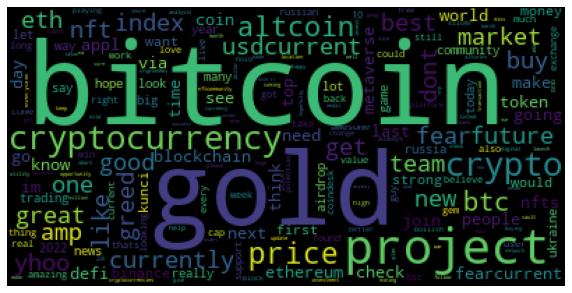

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(df_tf_idf.sum())
word_cloud_render(wordcloud)

### **vectors after the L2 normaliztion**

In [ ]:
tv = TfidfVectorizer(
binary=False, norm='l2',
use_idf=True, smooth_idf=True,
lowercase=True,
min_df=1, max_df=1.0, max_features=None,
ngram_range=(1, 1))

In [ ]:
model_tf_idf = tv.fit_transform(words)

In [ ]:
df_tf_idf = pd.DataFrame(model_tf_idf.sum(axis=0),columns=tv.get_feature_names_out())

In [ ]:
df_tf_idf.sum().sort_values(ascending=False)

bitcoin           856.021526
gold              666.043407
project           597.288350
cryptocurrency    520.408868
crypto            487.289100
                     ...    
1014                0.193179
procrastin          0.184206
coinaltcoin         0.109977
etn                 0.109977
electroneum         0.109977
Length: 35663, dtype: float64

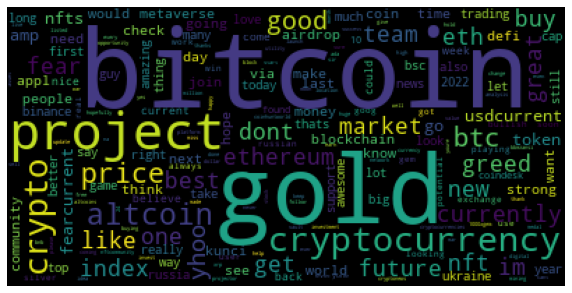

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(df_tf_idf.sum())
word_cloud_render(wordcloud)

## **5. Clustering data**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### TF-IDF Vectorization

In [ ]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF to a smaller sample cause I was getting RAM error on the Cloud
df_sample = n_data[0:10000]

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_sample['Tweet_text_cleaned'])

# See the complete matrix, not sparse.
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Cosine Similarity

In [ ]:
# Apply the cosine similarity to the words in the vector
cos_sim = cosine_similarity(X.toarray())
cos_sim

array([[1.        , 0.        , 0.02968271, ..., 0.        , 0.        ,
        0.05713038],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02968271, 0.        , 1.        , ..., 0.        , 0.16560385,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.05685366,
        0.        ],
       [0.        , 0.        , 0.16560385, ..., 0.05685366, 1.        ,
        0.        ],
       [0.05713038, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### PCA

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components = 2)

# Pass the cosine matrix to the pca and store the reduced vectors into cos_sim_pca
cos_sim_pca = pca.fit_transform(cos_sim)
cos_sim_pca

# Assign the PCA dimensions to variables
x0=cos_sim_pca[:,0]
x1=cos_sim_pca[:,1]

In [ ]:
# Check the dimension reduction in the cosine vector
cos_sim_pca

array([[-0.60576372, -0.3042012 ],
       [-0.58313969, -0.01870466],
       [-0.66769213, -0.25294959],
       ...,
       [-0.60578826,  1.51430535],
       [-0.61357145,  0.90963708],
       [-0.57908851, -0.20287779]])

In [ ]:
# Check the PCA Variance
pca.explained_variance_ratio_

array([0.32145073, 0.04927813])

### HCA Cluster

In [ ]:
# We have selected 8 as the number of clusters
hac = AgglomerativeClustering(n_clusters=8)
hac.fit(cos_sim_pca)
print(hac)
print(hac.labels_)

AgglomerativeClustering(n_clusters=8)
[1 1 1 ... 2 2 1]


### K-Means Cluster

In [ ]:
# Initialize kmeans with 8 centroids
kmeans = KMeans(n_clusters=8)

# Fit the model
kmeans.fit(cos_sim_pca)

# Store cluster labels in a variable
clusters = kmeans.labels_
print(kmeans.labels_)

# Check the centroids
print(kmeans.cluster_centers_)

[3 3 3 ... 4 0 3]
[[-0.59451896  0.56318853]
 [ 4.79918887 -0.09393279]
 [-0.6583539  -0.93970269]
 [-0.57839242 -0.08123094]
 [-0.550768    1.5741351 ]
 [-0.74313091 -2.20105912]
 [ 0.25234652  0.38871948]
 [ 6.33062119 -0.06491487]]


#### Plotting the K-Means Cluster

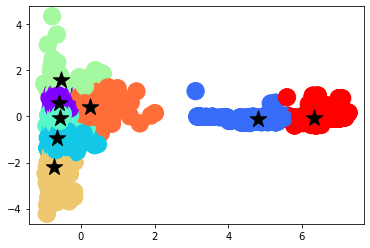

In [ ]:
n = cos_sim_pca.shape[0]
# Clusters
plt.scatter(x0, x1, c=kmeans.labels_, cmap='rainbow', s=300)
# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='black', s=300)

for i in range(n):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]

    # So many texts to plot out, so I've commented this part
    # label = "Text-" + str(i+1)
    # plt.text(x+0.01, y+0.01, label)

plt.show()